# Importar os dados


In [59]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from adjustText import adjust_text

file_path = "./Missing_Migrants_Global_Figures_allData.xlsx"
df = pd.read_excel(file_path)
display(df.head())


,Main ID,Incident ID,Incident Type,Region of Incident,Incident Date,Incident Year,Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Country of Incident,Migration Route,Location of Incident,Coordinates,UNSD Geographical Grouping,Information Source,URL,Source Quality
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014.0,January,1.0,NaN,1,...,Central America,Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.650259, -110.366453",Northern America,Pima County Office of the Medical Examiner (PC...,http://humaneborders.info/,5
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014.0,January,1.0,NaN,1,...,Latin America / Caribbean (P),Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.59713, -111.73756",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014.0,January,1.0,NaN,1,...,Latin America / Caribbean (P),Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.94026, -113.01125",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014.0,January,1.0,NaN,1,...,Central America,Violence,United States of America,US-Mexico border crossing,"near Douglas, Arizona, USA","31.506777, -109.315632",Northern America,"Ministry of Foreign Affairs Mexico, Pima Count...",http://bit.ly/1qfIw00,5
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014.0,January,1.0,0.0,1,...,Northern Africa,Harsh environmental conditions / lack of adequ...,Russian Federation,NaN,Border between Russia and Estonia,"59.1551, 28",Northern Europe,EUBusiness (Agence France-Presse),http://bit.ly/1rTFTjR,1


# Análise Descritiva dos Dados

In [60]:
display(df.describe())
display(df['Cause of Death'].value_counts())
display(df['Source Quality'].value_counts())
display(df['Country of Incident'].value_counts())
display(df['Source Quality'].describe())
display(df.info())
display(df.isnull().sum())
display(df.nunique())

,Incident Year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
count,19242.000000,18499.000000,1657.000000,19255.000000,2901.000000,5698.000000,12936.000000,4254.000000
mean,2020.158559,2.377264,18.345806,3.862685,38.791107,1.155669,1.665198,0.953691
std,3.027439,8.861996,43.001607,17.542329,92.289375,3.683906,4.386550,4.299888
min,2014.000000,0.000000,-13.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
25%,2018.000000,1.000000,2.000000,1.000000,4.000000,0.000000,1.000000,0.000000
50%,2021.000000,1.000000,6.000000,1.000000,13.000000,1.000000,1.000000,1.000000
75%,2023.000000,1.000000,18.000000,2.000000,38.000000,1.000000,1.000000,1.000000
max,2025.000000,750.000000,750.000000,1022.000000,1950.000000,168.000000,135.000000,250.000000


Cause of Death
Drowning                                                                                                                   4507
Mixed or unknown                                                                                                           4113
Vehicle accident / death linked to hazardous transport                                                                     3051
Sickness / lack of access to adequate healthcare                                                                           2387
Harsh environmental conditions / lack of adequate shelter, food, water                                                     2380
Violence                                                                                                                   1910
Accidental death                                                                                                            878
Drowning,Harsh environmental conditions / lack of adequate shelter, food, water          

Source Quality
4        6680
5        5252
2        3355
3        2129
1        1790
4,5        13
3,5        10
1,5        10
1,3         5
1,4         4
3,4         3
1,3,4       1
2,4         1
1,4,5       1
1,3,5       1
Name: count, dtype: int64

Country of Incident
United States of America      4573
Iran (Islamic Republic of)    3958
Libya                         2069
Mexico                        1546
Spain                          502
                              ... 
Sweden                           1
Equatorial Guinea                1
Czechia                          1
Dominica                         1
Sri Lanka                        1
Name: count, Length: 148, dtype: int64

count     19255
unique       15
top           4
freq       6680
Name: Source Quality, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19255 entries, 0 to 19254
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              19255 non-null  object 
 1   Incident ID                          19255 non-null  object 
 2   Incident Type                        19255 non-null  object 
 3   Region of Incident                   19255 non-null  object 
 4   Incident Date                        19242 non-null  object 
 5   Incident Year                        19242 non-null  float64
 6   Month                                19242 non-null  object 
 7   Number of Dead                       18499 non-null  float64
 8   Minimum Estimated Number of Missing  1657 non-null   float64
 9   Total Number of Dead and Missing     19255 non-null  int64  
 10  Number of Survivors                  2901 non-null   float64
 11  Number of Females           

None

Main ID                                    0
Incident ID                                0
Incident Type                              0
Region of Incident                         0
Incident Date                             13
Incident Year                             13
Month                                     13
Number of Dead                           756
Minimum Estimated Number of Missing    17598
Total Number of Dead and Missing           0
Number of Survivors                    16354
Number of Females                      13557
Number of Males                         6319
Number of Children                     15001
Country of Origin                         28
Region of Origin                           0
Cause of Death                             0
Country of Incident                        0
Migration Route                         2656
Location of Incident                       0
Coordinates                                0
UNSD Geographical Grouping                 0
Informatio

Main ID                                19255
Incident ID                            19255
Incident Type                              4
Region of Incident                        19
Incident Date                           3874
Incident Year                             12
Month                                     12
Number of Dead                            95
Minimum Estimated Number of Missing      129
Total Number of Dead and Missing         149
Number of Survivors                      253
Number of Females                         35
Number of Males                           64
Number of Children                        25
Country of Origin                        398
Region of Origin                         134
Cause of Death                            15
Country of Incident                      148
Migration Route                           30
Location of Incident                    9827
Coordinates                            13339
UNSD Geographical Grouping                24
Informatio

In [61]:
cols_to_use = ['Migration Route', 'Total Number of Dead and Missing', 'Number of Survivors']
df_routes = df[cols_to_use].copy()


print("Rotas Nan: " + str(df_routes['Migration Route'].isnull().sum()))
print('% Rotas Nan: ' + str(df_routes['Migration Route'].isnull().sum() / len(df_routes) * 100))

Rotas Nan: 2656
% Rotas Nan: 13.793819787068292


## Corrigindo valores

In [62]:
# Apagar linhas com a rota de migração igual a NaN
df_routes.dropna(subset=['Migration Route'], inplace=True)

In [63]:
print("Número de valores NaN na coluna 'Total Number of Dead and Missing':")
display(df_routes['Total Number of Dead and Missing'].isnull().sum())

print("\nNúmero de valores NaN na coluna 'Number of Survivors':")
display(df_routes['Number of Survivors'].isnull().sum())

Número de valores NaN na coluna 'Total Number of Dead and Missing':


np.int64(0)


Número de valores NaN na coluna 'Number of Survivors':


np.int64(14223)

In [64]:
# Converter colunas numéricas de "erro/NaN" com 0

df_routes['Number of Survivors'] = pd.to_numeric(df_routes['Number of Survivors'], errors='coerce').fillna(0)

In [65]:
# --- 2. Filtrar rotas por ocorrência ---

# Contar ocorrências de cada rota de migração
route_counts = df_routes['Migration Route'].value_counts()

# Obter rotas que aparecem pelo menos 10 vezes
routes_to_keep = route_counts[route_counts >= 10].index

# Filtrar o banco de dados para manter apenas essas rotas
df_filtered = df_routes[df_routes['Migration Route'].isin(routes_to_keep)].copy()
print("Aqui estão as rotas que serão mantidas: ")
display(routes_to_keep)

print("\nAqui estão as rotas que serão excluidas: ")
display(route_counts[route_counts < 10].index)

Aqui estão as rotas que serão mantidas: 


Index(['US-Mexico border crossing', 'Afghanistan to Iran',
       'Sahara Desert crossing', 'Central Mediterranean',
       'Western Mediterranean', 'Eastern Route to/from EHOA',
       'Eastern Mediterranean',
       'Western Africa / Atlantic route to the Canary Islands', 'Darien',
       'Western Balkans', 'English Channel to the UK',
       'Türkiye-Europe land route', 'Syria to Türkiye', 'Iran to Türkiye',
       'Route to Southern Africa', 'Belarus-EU border', 'Caribbean to US',
       'Horn of Africa Route', 'Dominican Republic to Puerto Rico',
       'Northern Route from EHOA', 'Italy to France',
       'Sea crossings to Mayotte', 'Ukraine to Europe',
       'Haiti to Dominican Republic', 'Venezuela to Caribbean'],
      dtype='object', name='Migration Route')


Aqui estão as rotas que serão excluidas: 


Index(['DRC to Uganda', 'Caribbean to Central America',
       'Horn of Africa to Yemen crossing',
       'Central Mediterranean,Sahara Desert crossing',
       'Central Mediterranean,US-Mexico border crossing'],
      dtype='object', name='Migration Route')

### Danger Ratio

In [ ]:
# --- 3. Engenharia de características: Taxas de Letalidade ---

# Calcular o dominador para as taxas de letalidade
denominator = df_filtered['Total Number of Dead and Missing'] + df_filtered['Number of Survivors']

# Calcular a taxa de perigo para cada incidente
df_filtered['Danger Ratio'] = np.divide(
    df_filtered['Total Number of Dead and Missing'],
    denominator,
    out=np.zeros_like(df_filtered['Total Number of Dead and Missing'], dtype=float),
    where=(denominator != 0)
)

# Calcula o número total de pessoas envolvidas em cada rota
df_filtered['Total People Involved'] = denominator


In [67]:
# Normalização dos dados

# --- 4. Escala e Agrupamento ---
# Agrupamento dos dados
normalized_summary = df_filtered.groupby('Migration Route').agg(
    Mean_Danger_Ratio=('Danger Ratio', 'mean'),
    Mean_People_Involved=('Total People Involved', 'mean')
)
# Selecionando as características para escala
features_to_scale = normalized_summary[['Mean_Danger_Ratio', 'Mean_People_Involved']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Modelos de IA

Foi escolhido dois modelos de agrupamento: K-means e Agrupamento Hierárquico

## Primeiro Modelo - K-means

In [79]:
# Número de clusters esclhidos: 3
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
normalized_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# --- 5. Análise de resultados ---
cluster_profiles = normalized_summary.groupby('Cluster')[['Mean_Danger_Ratio', 'Mean_People_Involved']].mean().sort_values('Mean_Danger_Ratio')
cluster_profiles['Quantidade'] = normalized_summary.groupby('Cluster').size()

print('--- Análise de Clusters com Dados Normalizados (k=3) ---')
print("\nPerfil Médio de Cada Cluster:")
print(cluster_profiles)

# Criar os clusters
profile_map = {
    cluster_profiles.index[0]: "Incidentes de Alta Letalidade",
    cluster_profiles.index[1]: "Incidentes de Letalidade Intermediária",
    cluster_profiles.index[2]: "Incidentes de Baixa Letalidade",
}
normalized_summary['Cluster_Profile'] = normalized_summary['Cluster'].map(profile_map)

print("\n--- Detalhes dos Clusters (k=3) ---")
for cluster_label, profile_name in profile_map.items():
    print(f"\n--- Cluster: {profile_name} ---")
    cluster_data = normalized_summary[normalized_summary['Cluster'] == cluster_label]
    print(f"Número de Rotas: {len(cluster_data)}")
    print("Perfil Médio:")
    print(cluster_profiles.loc[cluster_label].round(2))
    print("\nRotas neste Cluster:")
    print(cluster_data.sort_values('Mean_People_Involved', ascending=False))

--- Análise de Clusters com Dados Normalizados (k=3) ---

Perfil Médio de Cada Cluster:
         Mean_Danger_Ratio  Mean_People_Involved  Quantidade
Cluster                                                     
1                 0.580259             57.114298           2
2                 0.703250             17.634271           8
0                 0.924519              3.625372          15

--- Detalhes dos Clusters (k=3) ---

--- Cluster: Incidentes de Alta Letalidade ---
Número de Rotas: 2
Perfil Médio:
Mean_Danger_Ratio        0.58
Mean_People_Involved    57.11
Quantidade               2.00
Name: 1, dtype: float64

Rotas neste Cluster:
                                                    Mean_Danger_Ratio  \
Migration Route                                                         
Western Africa / Atlantic route to the Canary I...           0.468120   
Central Mediterranean                                        0.692398   

                                                    Mean_Peo

Gráfico do Agrupamento não Hierárquico

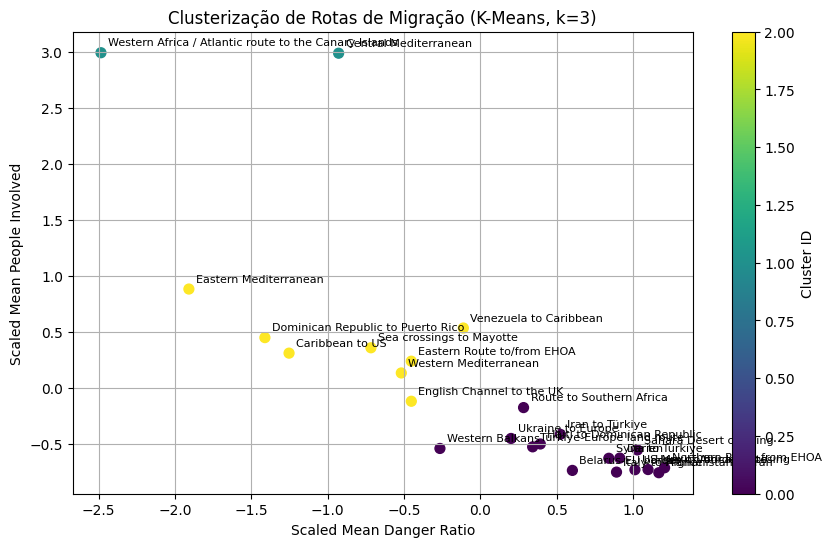

In [80]:
#gerar um gráfico 2d usando esses valores obtidos

import matplotlib.pyplot as plt
# Plotar os clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    scaled_features[:, 0],
    scaled_features[:, 1],
    c=normalized_summary['Cluster'],
    cmap='viridis',
    s=50  # size of points
)

# Adicionar rótulos e título
plt.xlabel('Scaled Mean Danger Ratio')
plt.ylabel('Scaled Mean People Involved')
plt.title('Clusterização de Rotas de Migração (K-Means, k=3)')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)

# Adicionar anotações nas rotas
route_texts = []
for i, route in enumerate(normalized_summary.index):
    route_texts.append(plt.annotate(route, (scaled_features[i, 0], scaled_features[i, 1]), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8))

plt.show()

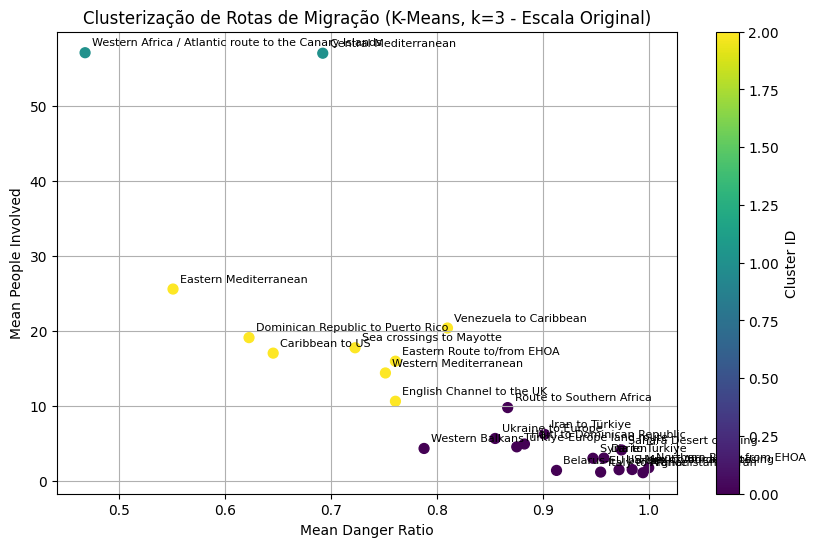

In [81]:
# Plotar com os valores de escala originais
plt.figure(figsize=(10, 6))
scatter_original = plt.scatter(
    normalized_summary['Mean_Danger_Ratio'],
    normalized_summary['Mean_People_Involved'],
    c=normalized_summary['Cluster'],
    cmap='viridis',
    s=50
)

plt.xlabel('Mean Danger Ratio')
plt.ylabel('Mean People Involved')
plt.title('Clusterização de Rotas de Migração (K-Means, k=3 - Escala Original)')
plt.colorbar(scatter_original, label='Cluster ID')
plt.grid(True)

# Adicionar anotações para as rotas na escala original de plot
for i, route in enumerate(normalized_summary.index):
    plt.annotate(route, (normalized_summary['Mean_Danger_Ratio'].iloc[i], normalized_summary['Mean_People_Involved'].iloc[i]), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.show()

## Segundo Modelo - Hierárquico Bottom-Up (Aglomerativo)

Dendrograma salvo como 'dendrogram_2d_analysis.png'.

--- Análise dos Clusters Hierárquicos (Letalidade vs. Escala) ---

Perfil Médio de Cada Cluster:
         Mean_Danger_Ratio  Mean_People_Involved
Cluster                                         
2                 0.580259             57.114298
3                 0.606511             20.606848
1                 0.765743             13.933665
0                 0.934271              3.573730

--- Detalhes dos Clusters Hierárquicos ---

--- Cluster: Incidentes de Baixa Letalidade Relativa ---
Número de Rotas: 2
Perfil Médio:
Mean_Danger_Ratio        0.58
Mean_People_Involved    57.11
Name: 2, dtype: float64

Rotas neste Cluster:
                                                    Mean_Danger_Ratio  \
Migration Route                                                         
Western Africa / Atlantic route to the Canary I...           0.468120   
Central Mediterranean                                        0.692398   

                     

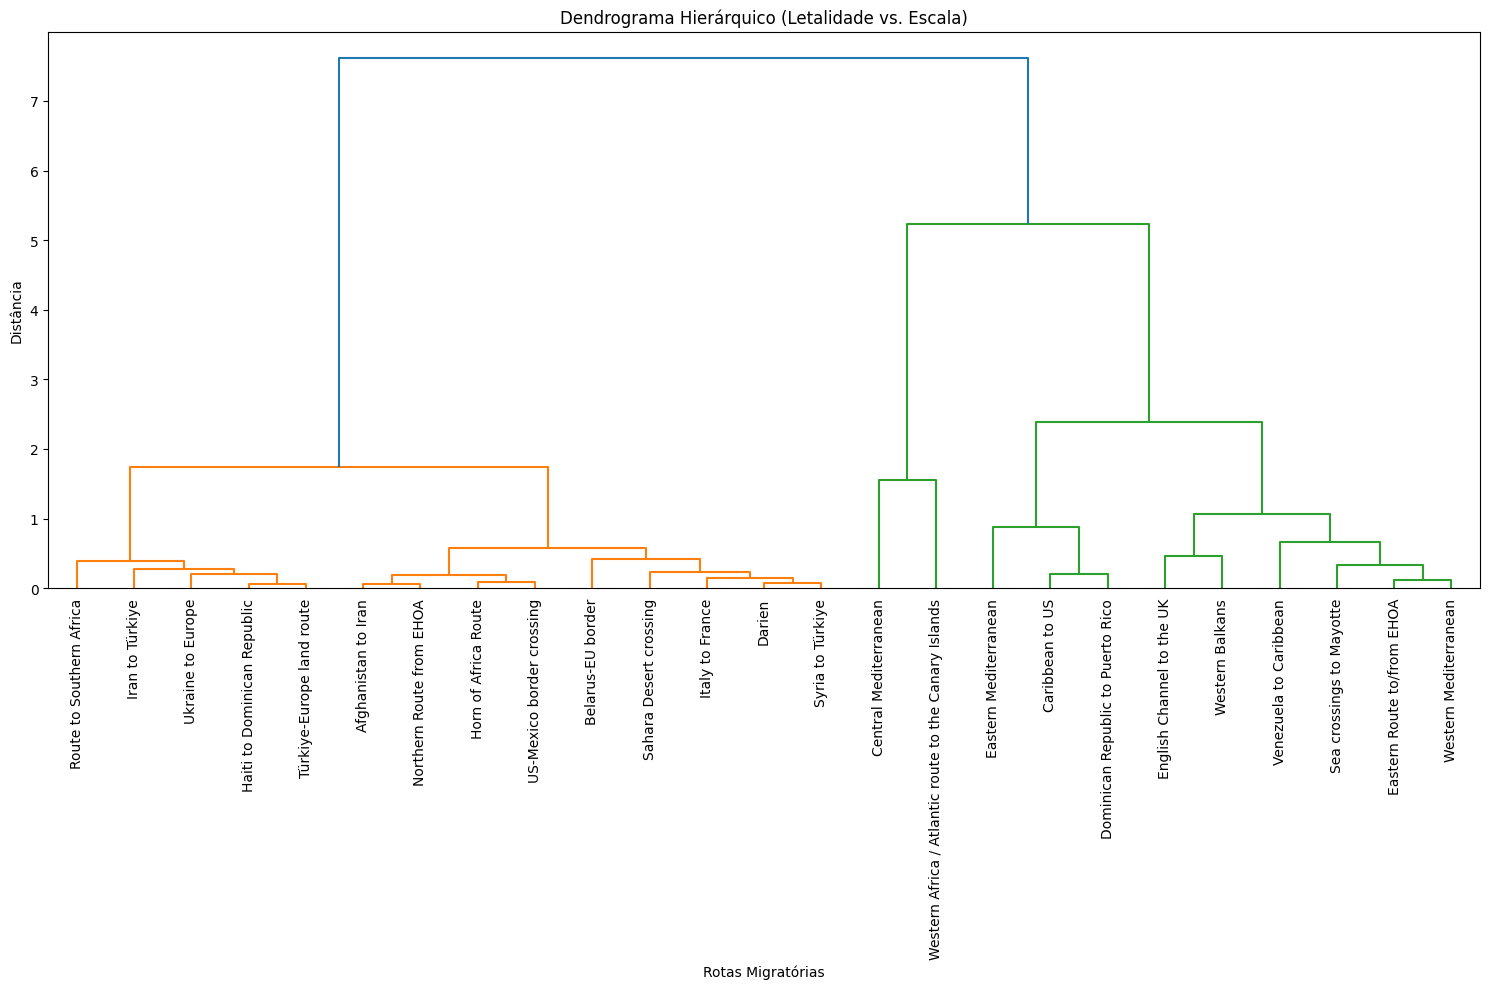

In [82]:
# Agrupamento Hierárquico Bidimensional


cols_to_use = ['Migration Route', 'Total Number of Dead and Missing', 'Number of Survivors']
df_routes = df[cols_to_use].copy()
df_routes.dropna(subset=['Migration Route'], inplace=True)
df_routes['Total Number of Dead and Missing'] = pd.to_numeric(df_routes['Total Number of Dead and Missing'], errors='coerce').fillna(0)
df_routes['Number of Survivors'] = pd.to_numeric(df_routes['Number of Survivors'], errors='coerce').fillna(0)

# --- 2. Filtrar rotas por ocorrência ---
route_counts = df_routes['Migration Route'].value_counts()
routes_to_keep = route_counts[route_counts >= 10].index
df_filtered = df_routes[df_routes['Migration Route'].isin(routes_to_keep)].copy()

# --- 3. Engenharia de característica (Abordagem 2D) ---
denominator = df_filtered['Total Number of Dead and Missing'] + df_filtered['Number of Survivors']
df_filtered['Danger Ratio'] = np.divide(
    df_filtered['Total Number of Dead and Missing'],
    denominator,
    out=np.zeros_like(denominator, dtype=float),
    where=(denominator != 0)
)
df_filtered['Total People Involved'] = denominator

summary_2d = df_filtered.groupby('Migration Route').agg(
    Mean_Danger_Ratio=('Danger Ratio', 'mean'),
    Mean_People_Involved=('Total People Involved', 'mean')
)

# --- 4. Escala e Clustering Hierárquico ---
features_to_scale = summary_2d[['Mean_Danger_Ratio', 'Mean_People_Involved']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# 4.1. Gerar a matriz de ligação para o dendrograma
Z = linkage(scaled_features, method='ward')

# 4.2. Criar e salvar o dendrograma
plt.figure(figsize=(15, 10))
plt.title('Dendrograma Hierárquico (Letalidade vs. Escala)')
plt.xlabel('Rotas Migratórias')
plt.ylabel('Distância')
dendrogram(
    Z,
    labels=summary_2d.index,
    leaf_rotation=90,
    leaf_font_size=10,
)
plt.tight_layout()
plt.savefig('dendrogram_2d_analysis.png')
print("Dendrograma salvo como 'dendrogram_2d_analysis.png'.")

# 4.3. Extrair 4 clusters para comparar com a análise de K-Means
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
summary_2d['Cluster'] = hc.fit_predict(scaled_features)

# --- 5. Análises de Clusters hierárquicos ---
cluster_profiles = summary_2d.groupby('Cluster')[['Mean_Danger_Ratio', 'Mean_People_Involved']].mean().sort_values('Mean_Danger_Ratio')

print("\n--- Análise dos Clusters Hierárquicos (Letalidade vs. Escala) ---")
print("\nPerfil Médio de Cada Cluster:")
print(cluster_profiles)

# Criar nomes descritivos baseados nos perfis calculados
profile_map = {
    cluster_profiles.index[0]: "Incidentes de Baixa Letalidade Relativa",
    cluster_profiles.index[1]: "Incidentes Catastróficos (Mediterrâneo)",
    cluster_profiles.index[2]: "Incidentes Grandes de Alta Letalidade",
    cluster_profiles.index[3]: "Incidentes Pequenos de Alta Letalidade"
}
summary_2d['Cluster_Profile'] = summary_2d['Cluster'].map(profile_map)


print("\n--- Detalhes dos Clusters Hierárquicos ---")
for cluster_label, profile_name in sorted(profile_map.items(), key=lambda item: cluster_profiles.loc[item[0]]['Mean_Danger_Ratio']):
    print(f"\n--- Cluster: {profile_name} ---")
    cluster_data = summary_2d[summary_2d['Cluster'] == cluster_label]
    print(f"Número de Rotas: {len(cluster_data)}")
    print("Perfil Médio:")
    print(cluster_profiles.loc[cluster_label].round(2))
    print("\nRotas neste Cluster:")
    print(cluster_data[['Mean_Danger_Ratio', 'Mean_People_Involved']].sort_values('Mean_People_Involved', ascending=False))

## Terceiro Modelo

# Resultados

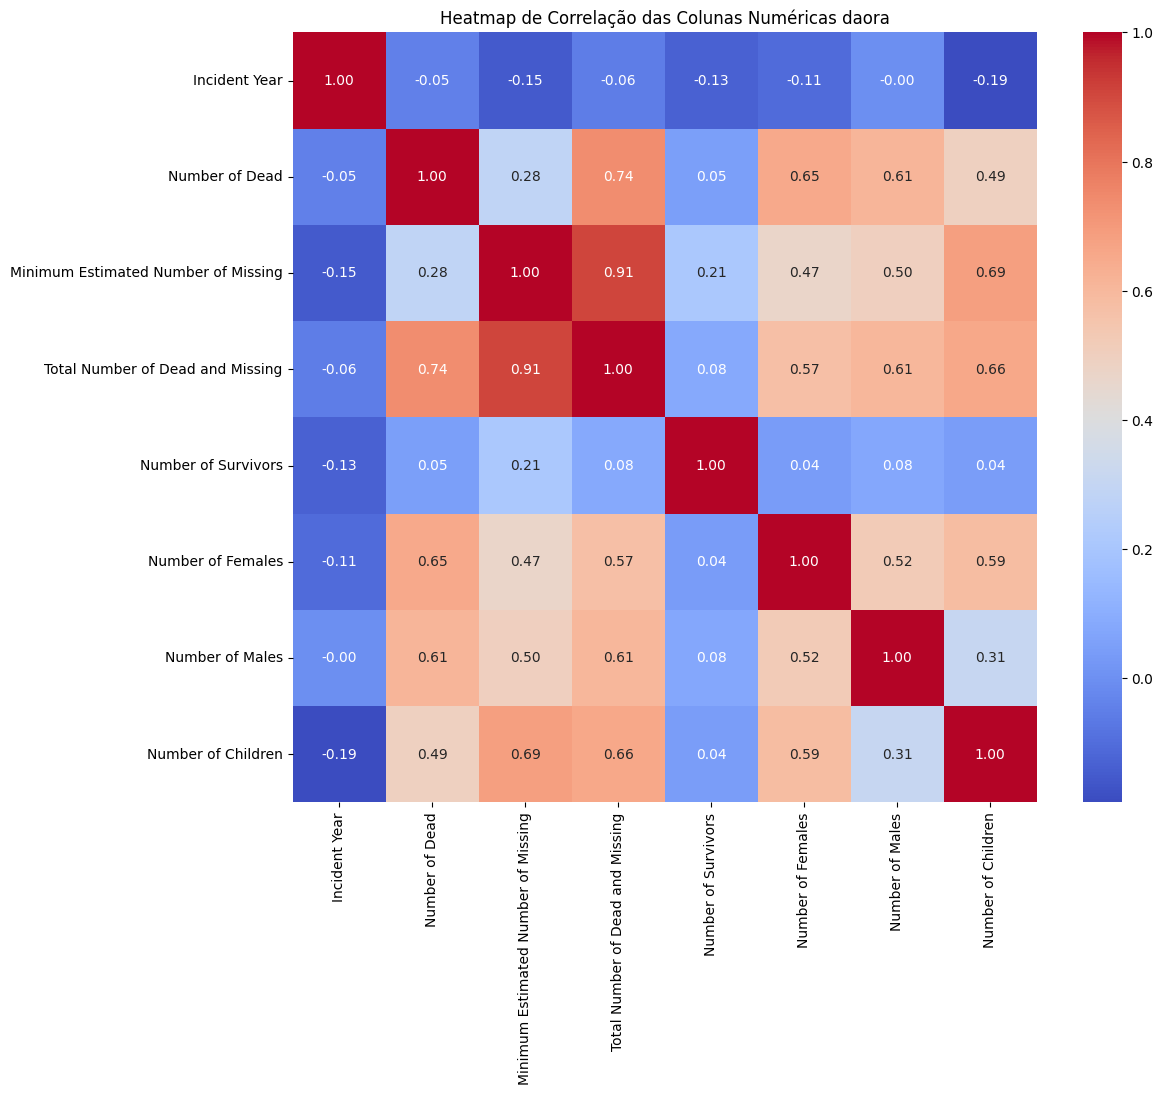

In [72]:
# Selecionar apenas colunas numéricas para análise de correlação
numerical_cols = df.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
correlation_matrix = df[numerical_cols].corr()

# Gerar o heatmap
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação das Colunas Numéricas daora')
plt.show()

In [ ]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(scaled_features, labels, metric='euclidean')
print("Silhouette Score:", silhouette)



Silhouette Score: 0.6023563098442799
